In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import operator
import random

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
test_filename = "test.csv"
train_filename = "train.csv"

training = np.genfromtxt(train_filename,delimiter=',',skip_header=1)
test = np.genfromtxt(test_filename,delimiter=',',skip_header=1)

X = training[:,1].reshape(50,1)
Y = training[:,2].reshape(50,1)
T = test[:,1].reshape(50,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=2)

# Polynomial Regression

In [3]:
for i in range(21):
    polynomial_features = PolynomialFeatures(degree=i)
    x_poly_train = polynomial_features.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly_train, Y_train)        
    Y_predict_train = lin_reg.predict(x_poly_train)
    RMSE_train = np.sqrt(mean_squared_error(Y_train, Y_predict_train))
    
    x_poly_test = polynomial_features.fit_transform(X_test)
    Y_predict_test = lin_reg.predict(x_poly_test)    
    RMSE_Val = np.sqrt(mean_squared_error(Y_test, Y_predict_test))
    
    RMSEtot = RMSE_Val**2 + RMSE_train**2
    print("RMSE_train = ",RMSE_train)
    print("RMSE_Val = ",RMSE_Val)
    print("RMSE Total = ",RMSEtot)
    print("Degree = ",i) 
    print(" ")


RMSE_train =  0.5078771356563498
RMSE_Val =  0.2917260518550954
RMSE Total =  0.3430432742534602
Degree =  0
 
RMSE_train =  0.4896310780976268
RMSE_Val =  0.21393132237809503
RMSE Total =  0.2855052033334847
Degree =  1
 
RMSE_train =  0.487927750954766
RMSE_Val =  0.21740009298264198
RMSE Total =  0.28533629058063753
Degree =  2
 
RMSE_train =  0.3675098826820034
RMSE_Val =  0.38331544047805305
RMSE Total =  0.28199424077782376
Degree =  3
 
RMSE_train =  0.36459609361910766
RMSE_Val =  0.4025429534341806
RMSE Total =  0.2949711408418261
Degree =  4
 
RMSE_train =  0.31223110109080454
RMSE_Val =  0.46238397965644873
RMSE Total =  0.3112872051313114
Degree =  5
 
RMSE_train =  0.31191549164603893
RMSE_Val =  0.46375336020728647
RMSE Total =  0.3123584530323394
Degree =  6
 
RMSE_train =  0.3063281421048328
RMSE_Val =  0.42130388968045507
RMSE Total =  0.2713338981052797
Degree =  7
 
RMSE_train =  0.30627340099572814
RMSE_Val =  0.4234155190917154
RMSE Total =  0.27308409796519684
Deg

## Best Polynomial Regression Model

In [4]:
polynomial_features = PolynomialFeatures(degree=16)
x_poly = polynomial_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, Y)        
Y_predict = lin_reg.predict(x_poly)

T_poly = polynomial_features.fit_transform(T)
T_predict = lin_reg.predict(T_poly)
df=pd.read_csv('test.csv', index_col=False)
df['Poly']=T_predict

xx = np.linspace(0,2,100).reshape(100,1)
xxx = polynomial_features.fit_transform(xx)
yy = lin_reg.predict(xxx)

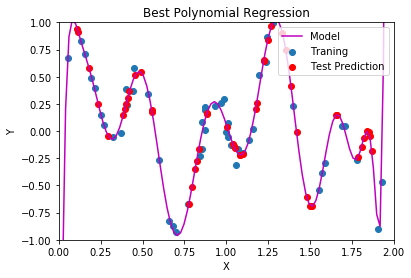

In [5]:
plt.figure(1)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Best Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

## Underfit Polynomial Regression Model

In [6]:
polynomial_features = PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, Y)        
Y_predict = lin_reg.predict(x_poly)

T_poly = polynomial_features.fit_transform(T)
T_predict = lin_reg.predict(T_poly)
xx = np.linspace(0,2,100).reshape(100,1)
xxx = polynomial_features.fit_transform(xx)
yy = lin_reg.predict(xxx)

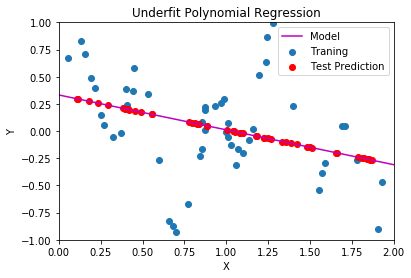

In [7]:
plt.figure(2)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Underfit Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

## Overfit Polynomial Regression Model

In [8]:
polynomial_features = PolynomialFeatures(degree=50)
x_poly = polynomial_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, Y)        
Y_predict = lin_reg.predict(x_poly)

T_poly = polynomial_features.fit_transform(T)
T_predict = lin_reg.predict(T_poly)
xx = np.linspace(0,2,100).reshape(100,1)
xxx = polynomial_features.fit_transform(xx)
yy = lin_reg.predict(xxx)

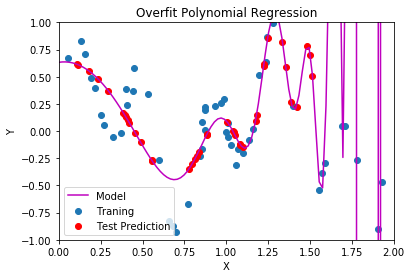

In [9]:
plt.figure(3)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Overfit Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# SVM Regression

In [10]:
for i in range(6):
    svm_poly_reg = SVR(kernel="poly", degree=i, C=10, epsilon=0.1)
    svm_poly_reg.fit(X_train, Y_train)       
    Y_predict_train = svm_poly_reg.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(Y_train, Y_predict_train))
    
    Y_predict_test = svm_poly_reg.predict(X_test)    
    RMSE_Val = np.sqrt(mean_squared_error(Y_test, Y_predict_test))
    
    RMSEtot = RMSE_Val**2 + RMSE_train**2
    print("RMSE_train = ",RMSE_train)
    print("RMSE_Val = ",RMSE_Val)
    print("RMSE Total = ",RMSEtot)
    print("Degree = ",i) 
    print(" ")

RMSE_train =  0.5091736842254969
RMSE_Val =  0.30437057908809034
RMSE Total =  0.35189929012218546
Degree =  0
 
RMSE_train =  0.49226149318615575
RMSE_Val =  0.2041988587607088
RMSE Total =  0.28401855159303957
Degree =  1
 
RMSE_train =  0.49491637648980685
RMSE_Val =  0.21634732929211087
RMSE Total =  0.2917483866096293
Degree =  2
 
RMSE_train =  0.49257643800094864
RMSE_Val =  0.22953683237780514
RMSE Total =  0.29531870469173904
Degree =  3
 
RMSE_train =  0.48960651641643116
RMSE_Val =  0.243854675454082
RMSE Total =  0.29917964365824873
Degree =  4
 
RMSE_train =  0.486831364738366
RMSE_Val =  0.24868813823292107
RMSE Total =  0.29885056779077646
Degree =  5
 


C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale

# Best SVM Regression Model

In [11]:
svm_poly_reg = SVR(kernel="poly", degree=1, C=10, epsilon=0.1)
svm_poly_reg.fit(X, Y)       
Y_predict = svm_poly_reg.predict(X)    

T_predict = svm_poly_reg.predict(T)
df['SVM']=T_predict

xx = np.linspace(0,2,100).reshape(100,1)
yy = svm_poly_reg.predict(xx)

C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


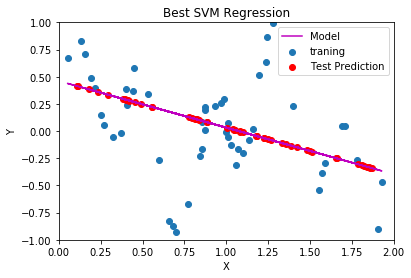

In [12]:
plt.figure(4)
plt.scatter(X,Y,label = "traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(X, Y_predict, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Best SVM Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# Underfit SVM Regression Model

In [13]:
svm_poly_reg = SVR(kernel="poly", degree=0, C=10, epsilon=0.1)
svm_poly_reg.fit(X, Y)       
Y_predict = svm_poly_reg.predict(X)    

T_predict = svm_poly_reg.predict(T)

xx = np.linspace(0,2,100).reshape(100,1)
yy = svm_poly_reg.predict(xx)

C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


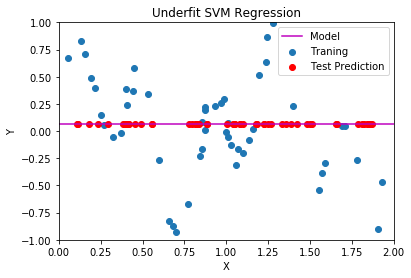

In [14]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Underfit SVM Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# Overfit SVM Regression Model

In [15]:
svm_poly_reg = SVR(kernel="poly", degree=5, C=10, epsilon=0.1)
svm_poly_reg.fit(X, Y)       
Y_predict = svm_poly_reg.predict(X)    

T_predict = svm_poly_reg.predict(T)

xx = np.linspace(0,2,100).reshape(100,1)
yy = svm_poly_reg.predict(xx)

C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TUF GAMING\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


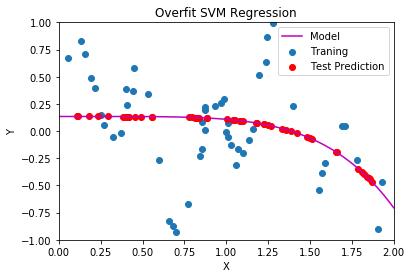

In [16]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Overfit SVM Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# KNN Regression

In [17]:
for i in range(1,11):
    KNN_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors = i)
    KNN_reg.fit(X_train, Y_train)       
    Y_predict_train = KNN_reg.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(Y_train, Y_predict_train))
    
    Y_predict_test = KNN_reg.predict(X_test)    
    RMSE_Val = np.sqrt(mean_squared_error(Y_test, Y_predict_test))
    
    RMSEtot = RMSE_Val**2 + RMSE_train**2
    print("RMSE_train = ",RMSE_train)
    print("RMSE_Val = ",RMSE_Val)
    print("RMSE Total = ",RMSEtot)
    print("Degree = ",i) 
    print(" ")

RMSE_train =  0.0
RMSE_Val =  0.3130740423116299
RMSE Total =  0.09801535596934421
Degree =  1
 
RMSE_train =  0.13024543315486764
RMSE_Val =  0.2736416897593078
RMSE Total =  0.09184364723202836
Degree =  2
 
RMSE_train =  0.14840069121679725
RMSE_Val =  0.24660733378945707
RMSE Total =  0.0828379422323679
Degree =  3
 
RMSE_train =  0.189452206526561
RMSE_Val =  0.22591223940329402
RMSE Total =  0.08692847846999395
Degree =  4
 
RMSE_train =  0.24607671819838972
RMSE_Val =  0.2714715701680694
RMSE Total =  0.13425056464880672
Degree =  5
 
RMSE_train =  0.28520491793940944
RMSE_Val =  0.2975472139647862
RMSE Total =  0.16987618975503152
Degree =  6
 
RMSE_train =  0.32582795197285624
RMSE_Val =  0.3267089334816301
RMSE Total =  0.21290258150353011
Degree =  7
 
RMSE_train =  0.3515971002909264
RMSE_Val =  0.3315561978000593
RMSE Total =  0.2335500332326198
Degree =  8
 
RMSE_train =  0.3827951950121676
RMSE_Val =  0.34179664263769427
RMSE Total =  0.2633571062428031
Degree =  9
 
RMS

# Best KNN Regression Model

In [18]:
KNN_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)
KNN_reg.fit(X, Y)       
Y_predict = KNN_reg.predict(X)
    
T_predict = KNN_reg.predict(T)  
df['KNN']=T_predict
    
xx = np.linspace(0,2,100).reshape(100,1)
yy = KNN_reg.predict(xx)

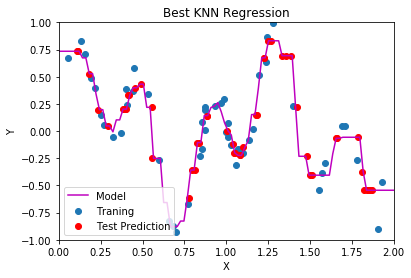

In [19]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Best KNN Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# Underfit KNN Regression Model

In [20]:
KNN_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 10)
KNN_reg.fit(X, Y)       
Y_predict = KNN_reg.predict(X)
    
T_predict = KNN_reg.predict(T)    
    
xx = np.linspace(0,2,100).reshape(100,1)
yy = KNN_reg.predict(xx)

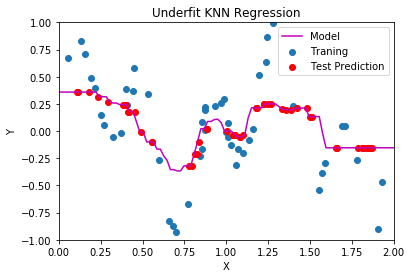

In [21]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Underfit KNN Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# Overfit KNN Regression Model

In [22]:
KNN_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 1)
KNN_reg.fit(X, Y)       
Y_predict = KNN_reg.predict(X)
    
T_predict = KNN_reg.predict(T)    
    
xx = np.linspace(0,2,100).reshape(100,1)
yy = KNN_reg.predict(xx)

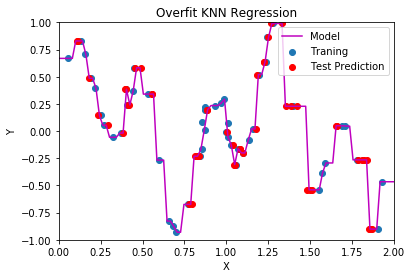

In [23]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Overfit KNN Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# Decision Tree Regression

In [24]:
for i in range(1,11):
    Dec_Tree_reg = DecisionTreeRegressor(max_depth = i)
    Dec_Tree_reg.fit(X_train, Y_train)       
    Y_predict_train = Dec_Tree_reg.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(Y_train, Y_predict_train))
    
    Y_predict_test = Dec_Tree_reg.predict(X_test)    
    RMSE_Val = np.sqrt(mean_squared_error(Y_test, Y_predict_test))
    
    RMSEtot = RMSE_Val**2 + RMSE_train**2
    print("RMSE_train = ",RMSE_train)
    print("RMSE_Val = ",RMSE_Val)
    print("RMSE Total = ",RMSEtot)
    print("Degree = ",i) 
    print(" ")

RMSE_train =  0.457766932012728
RMSE_Val =  0.28408772216069944
RMSE Total =  0.2902563979268003
Degree =  1
 
RMSE_train =  0.43011888988258185
RMSE_Val =  0.2785424461279984
RMSE Total =  0.26258815372879346
Degree =  2
 
RMSE_train =  0.38834077186216853
RMSE_Val =  0.38282450989777034
RMSE Total =  0.29736316046897293
Degree =  3
 
RMSE_train =  0.28747499600503235
RMSE_Val =  0.3341155201109729
RMSE Total =  0.19427505410711932
Degree =  4
 
RMSE_train =  0.14892179748323994
RMSE_Val =  0.37109632993102665
RMSE Total =  0.1598901878539165
Degree =  5
 
RMSE_train =  0.09531490846970704
RMSE_Val =  0.30524128428762637
RMSE Total =  0.10225717341014817
Degree =  6
 
RMSE_train =  0.05325136605964963
RMSE_Val =  0.3015305310112354
RMSE Total =  0.09375636911913639
Degree =  7
 
RMSE_train =  0.038770420701990466
RMSE_Val =  0.3018027620565779
RMSE Total =  0.09258805270638872
Degree =  8
 
RMSE_train =  0.010918632478748871
RMSE_Val =  0.3116074714308482
RMSE Total =  0.0972184327867

# Best Decision Tree Regression Model

In [25]:
Dec_Tree_reg = DecisionTreeRegressor(max_depth = 8)
Dec_Tree_reg.fit(X_train, Y_train)       
Y_predict_train = Dec_Tree_reg.predict(X_train)
    
Y_predict_test = Dec_Tree_reg.predict(X_test) 
df['DecTree']=T_predict
   
xx = np.linspace(0,2,100).reshape(100,1)
yy = Dec_Tree_reg.predict(xx)

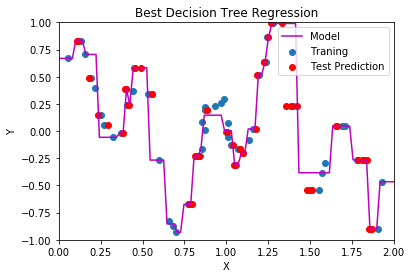

In [26]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Best Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# Underfit Decision Tree Regression Model

In [27]:
Dec_Tree_reg = DecisionTreeRegressor(max_depth = 1)
Dec_Tree_reg.fit(X_train, Y_train)       
Y_predict_train = Dec_Tree_reg.predict(X_train)
    
Y_predict_test = Dec_Tree_reg.predict(X_test)    
   
xx = np.linspace(0,2,100).reshape(100,1)
yy = Dec_Tree_reg.predict(xx)

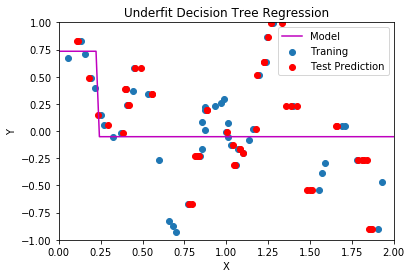

In [28]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Underfit Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()

# Overfit Decision Tree Regression Model

In [29]:
Dec_Tree_reg = DecisionTreeRegressor(max_depth = 10)
Dec_Tree_reg.fit(X_train, Y_train)       
Y_predict_train = Dec_Tree_reg.predict(X_train)
    
Y_predict_test = Dec_Tree_reg.predict(X_test)    
   
xx = np.linspace(0,2,100).reshape(100,1)
yy = Dec_Tree_reg.predict(xx)

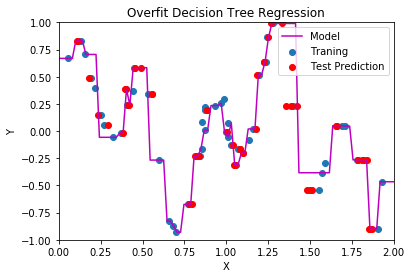

In [30]:
plt.figure(4)
plt.scatter(X,Y,label = "Traning")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx,yy), key = sort_axis)
xx, yy = zip(*sorted_zip)
plt.plot(xx, yy, color='m', label="Model")
plt.scatter(T, T_predict, color='r', label="Test Prediction")
plt.legend()
plt.title('Overfit Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([0, 2, -1, 1])
plt.show()